### Importing the modules

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston


### Loading Dataset

In [2]:
boston_dataset = load_boston()

### EDA 

In [3]:
type(boston_dataset)

sklearn.utils.Bunch

In [4]:
boston_dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
boston_dataset_X = boston_dataset['data']
boston_dataset_Y = boston_dataset['target']
boston_dataset_X_names = boston_dataset['feature_names']
boston_dataset_X_desc = boston_dataset['DESCR']

In [6]:
print(boston_dataset_X_desc)


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

#### Creating the DataFrame

In [7]:
def get_df_info(df, include_unique_values=False):
    col_name_list = list(df.columns)
    col_type_list = [type(df[col][0]) for col in col_name_list]
    col_null_count_list = [df[col].isnull().sum() for col in col_name_list]
    col_unique_count_list = [df[col].nunique() for col in col_name_list]
    col_memory_usage_list = [df[col].memory_usage(deep=True) for col in col_name_list]
    df_total_memory_usage = sum(col_memory_usage_list) / 1048576
    if include_unique_values:
        col_unique_list = [df[col].unique() for col in col_name_list]
        df_info = pd.DataFrame({'column_name': col_name_list, 'type': col_type_list, 
                                'null_count': col_null_count_list, 'nunique': col_unique_count_list, 
                                'unique_values': col_unique_list})
    else:
        df_info = pd.DataFrame({'column_name': col_name_list, 'type': col_type_list, 
                                'null_count': col_null_count_list, 'nunique': col_unique_count_list})
    return df_info, df_total_memory_usage

In [8]:
df_boston_data = pd.DataFrame(data =boston_dataset_X, columns = boston_dataset_X_names )
df_boston_data['MEDV'] = boston_dataset_Y
df_boston_data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
df_boston_data_info, df_boston_data_mem_usage = get_df_info(df_boston_data, True)
df_boston_data_info

,column_name,type,null_count,nunique,unique_values
0,CRIM,<class 'numpy.float64'>,0,504,"[0.00632, 0.02731, 0.02729, 0.03237, 0.06905, ..."
1,ZN,<class 'numpy.float64'>,0,26,"[18.0, 0.0, 12.5, 75.0, 21.0, 90.0, 85.0, 100...."
2,INDUS,<class 'numpy.float64'>,0,76,"[2.31, 7.07, 2.18, 7.87, 8.14, 5.96, 2.95, 6.9..."
3,CHAS,<class 'numpy.float64'>,0,2,"[0.0, 1.0]"
4,NOX,<class 'numpy.float64'>,0,81,"[0.538, 0.469, 0.458, 0.524, 0.499, 0.428, 0.4..."
5,RM,<class 'numpy.float64'>,0,446,"[6.575, 6.421, 7.185, 6.998, 7.147, 6.43, 6.01..."
6,AGE,<class 'numpy.float64'>,0,356,"[65.2, 78.9, 61.1, 45.8, 54.2, 58.7, 66.6, 96...."
7,DIS,<class 'numpy.float64'>,0,412,"[4.09, 4.9671, 6.0622, 5.5605, 5.9505, 6.0821,..."
8,RAD,<class 'numpy.float64'>,0,9,"[1.0, 2.0, 3.0, 5.0, 4.0, 8.0, 6.0, 7.0, 24.0]"
9,TAX,<class 'numpy.float64'>,0,66,"[296.0, 242.0, 222.0, 311.0, 307.0, 279.0, 252..."


In [10]:
df_boston_data_mem_usage

0.055755615234375

In [11]:
df_boston_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### PreProcessing the DataFrame

In [12]:
df_boston_data.CHAS = df_boston_data.CHAS.astype(np.int8)
df_boston_data.RAD = df_boston_data.RAD.astype(np.int8)
df_boston_data.PTRATIO =df_boston_data.PTRATIO.astype(np.float32)

In [13]:
df_boston_data_info, df_boston_data_mem_usage = get_df_info(df_boston_data, True)
df_boston_data_info

,column_name,type,null_count,nunique,unique_values
0,CRIM,<class 'numpy.float64'>,0,504,"[0.00632, 0.02731, 0.02729, 0.03237, 0.06905, ..."
1,ZN,<class 'numpy.float64'>,0,26,"[18.0, 0.0, 12.5, 75.0, 21.0, 90.0, 85.0, 100...."
2,INDUS,<class 'numpy.float64'>,0,76,"[2.31, 7.07, 2.18, 7.87, 8.14, 5.96, 2.95, 6.9..."
3,CHAS,<class 'numpy.int8'>,0,2,"[0, 1]"
4,NOX,<class 'numpy.float64'>,0,81,"[0.538, 0.469, 0.458, 0.524, 0.499, 0.428, 0.4..."
5,RM,<class 'numpy.float64'>,0,446,"[6.575, 6.421, 7.185, 6.998, 7.147, 6.43, 6.01..."
6,AGE,<class 'numpy.float64'>,0,356,"[65.2, 78.9, 61.1, 45.8, 54.2, 58.7, 66.6, 96...."
7,DIS,<class 'numpy.float64'>,0,412,"[4.09, 4.9671, 6.0622, 5.5605, 5.9505, 6.0821,..."
8,RAD,<class 'numpy.int8'>,0,9,"[1, 2, 3, 5, 4, 8, 6, 7, 24]"
9,TAX,<class 'numpy.float64'>,0,66,"[296.0, 242.0, 222.0, 311.0, 307.0, 279.0, 252..."


#### Data Visualization

<AxesSubplot:>

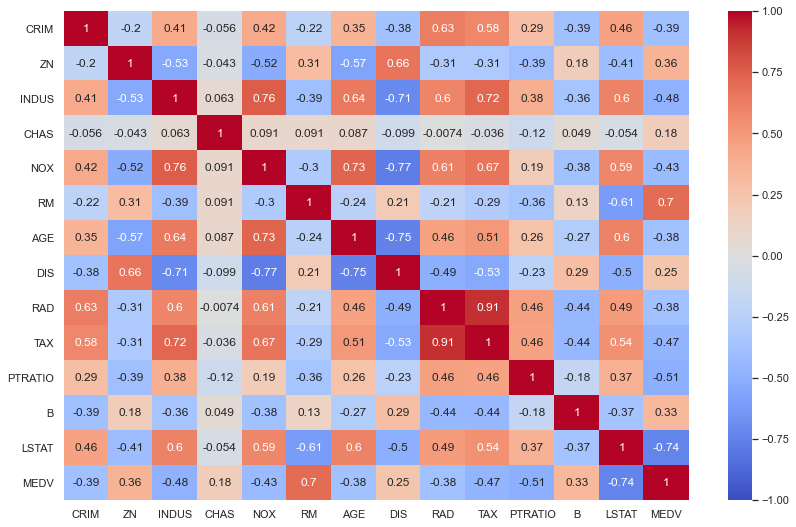

In [14]:
import seaborn as sb
sb.set(rc = {'figure.figsize' : (14, 9)} )
sb.heatmap(df_boston_data.corr(), cmap = 'coolwarm', vmax = -1, vmin =  1, annot = True)


### Create Models and Evaluate them 

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

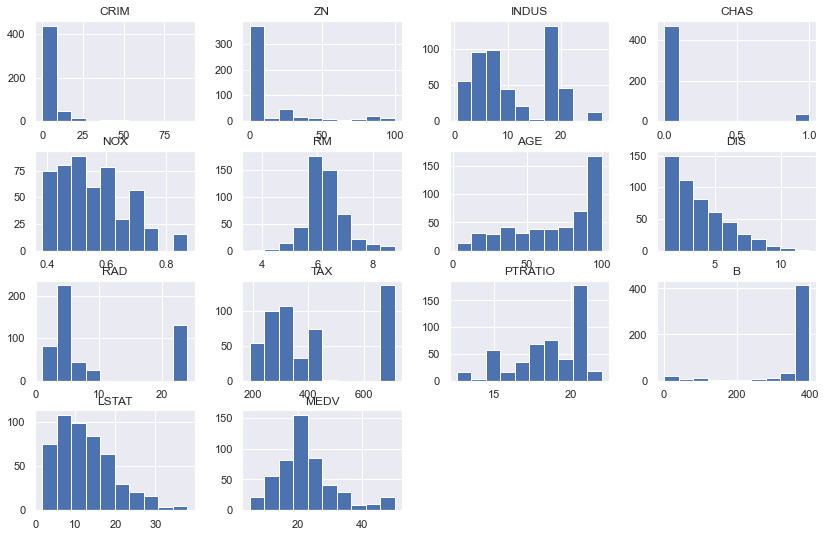

In [15]:
df_boston_data.hist()

In [16]:
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.linear_model import LinearRegression as LR 
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import RandomForestRegressor as RFR

from sklearn.metrics import r2_score, mean_absolute_error

In [17]:
def show_model_eval_table(model_attrib):
    df_model_eval = pd.DataFrame({'model': model_attrib['model_names'],
                                  'feature_count': model_attrib['model_feature_counts'], 
                                  'feature_names': model_attrib['model_feature_names'], 
                                  'r2': model_attrib['model_r2_scores'], 
                                  'mae': model_attrib['model_mae_scores']})
    return df_model_eval.round(2)

In [18]:
model_attrib = {
    'model_names': [],
    'model_feature_counts': [],
    'model_feature_names': [],
    'model_r2_scores': [],
    'model_mae_scores': []
}

### Creating model 1 with all features.

In [19]:
X_train, X_test, Y_train, Y_test= train_test_split(df_boston_data.loc[:, :'LSTAT' ], df_boston_data.MEDV, random_state = 0)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(379, 13) (127, 13)
(379,) (127,)


In [20]:
### Linear Regression model
lr_model_1 = LR()
lr_model_1.fit(X_train, Y_train)
y_hat_lr_model_1 = lr_model_1.predict(X_test)
model_attrib['model_names'].append('lr_model_1')
model_attrib['model_feature_counts'].append(X_train.shape[1])
model_attrib['model_feature_names'].append(list(X_train.columns))
model_attrib['model_r2_scores'].append(r2_score(Y_test, y_hat_lr_model_1))
model_attrib['model_mae_scores'].append(mean_absolute_error(Y_test, y_hat_lr_model_1))

#RandomForestRegressor
rf_model_1 = RFR(random_state = 0)
rf_model_1.fit(X_train, Y_train)
y_hat_rf_model_1 = rf_model_1.predict(X_test)
model_attrib['model_names'].append('rf_model_1')
model_attrib['model_feature_counts'].append(X_train.shape[1])
model_attrib['model_feature_names'].append(list(X_train.columns))
model_attrib['model_r2_scores'].append(r2_score(Y_test, y_hat_rf_model_1))
model_attrib['model_mae_scores'].append(mean_absolute_error(Y_test, y_hat_rf_model_1))


#DecisionTreeRegressor
dt_model_1 = DTR(random_state = 0)
dt_model_1.fit(X_train, Y_train)
y_hat_dt_model_1 = dt_model_1.predict(X_test)
model_attrib['model_names'].append('dt_model_1')
model_attrib['model_feature_counts'].append(X_train.shape[1])
model_attrib['model_feature_names'].append(list(X_train.columns))
model_attrib['model_r2_scores'].append(r2_score(Y_test, y_hat_dt_model_1))
model_attrib['model_mae_scores'].append(mean_absolute_error(Y_test, y_hat_dt_model_1))

In [21]:
show_model_eval_table(model_attrib)

,model,feature_count,feature_names,r2,mae
0,lr_model_1,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.64,3.67
1,rf_model_1,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.80,2.57
2,dt_model_1,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.66,3.40


### Creating X2  set using the correlation technique with 10 features

In [22]:
X2_train = X_train.drop(["CHAS", "RAD", 'DIS'], axis = 1)
X2_test = X_test.drop(["CHAS", "RAD", 'DIS'], axis = 1)
print(X2_train.shape, X2_test.shape)
print(Y_train.shape, Y_test.shape)

(379, 10) (127, 10)
(379,) (127,)


### Creating model 2 with X2 features.

In [23]:
### Linear Regression model
lr_model_2 = LR()
lr_model_2.fit(X2_train, Y_train)
y_hat_lr_model_2 = lr_model_2.predict(X2_test)
model_attrib['model_names'].append('lr_model_2')
model_attrib['model_feature_counts'].append(X2_train.shape[1])
model_attrib['model_feature_names'].append(list(X2_train.columns))
model_attrib['model_r2_scores'].append(r2_score(Y_test, y_hat_lr_model_2))
model_attrib['model_mae_scores'].append(mean_absolute_error(Y_test, y_hat_lr_model_2))

#RandomForestRegressor
rf_model_2 = RFR(random_state = 0)
rf_model_2.fit(X2_train, Y_train)
y_hat_rf_model_2 = rf_model_2.predict(X2_test)
model_attrib['model_names'].append('rf_model_2')
model_attrib['model_feature_counts'].append(X2_train.shape[1])
model_attrib['model_feature_names'].append(list(X2_train.columns))
model_attrib['model_r2_scores'].append(r2_score(Y_test, y_hat_rf_model_2))
model_attrib['model_mae_scores'].append(mean_absolute_error(Y_test, y_hat_rf_model_2))


#DecisionTreeRegressor
dt_model_2 = DTR(random_state = 0)
dt_model_2.fit(X2_train, Y_train)
y_hat_dt_model_2 = dt_model_2.predict(X2_test)
model_attrib['model_names'].append('dt_model_2')
model_attrib['model_feature_counts'].append(X2_train.shape[1])
model_attrib['model_feature_names'].append(list(X2_train.columns))
model_attrib['model_r2_scores'].append(r2_score(Y_test, y_hat_dt_model_2))
model_attrib['model_mae_scores'].append(mean_absolute_error(Y_test, y_hat_dt_model_2))

In [24]:
show_model_eval_table(model_attrib)

,model,feature_count,feature_names,r2,mae
0,lr_model_1,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.64,3.67
1,rf_model_1,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.80,2.57
2,dt_model_1,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.66,3.40
3,lr_model_2,10,"[CRIM, ZN, INDUS, NOX, RM, AGE, TAX, PTRATIO, ...",0.55,4.00
4,rf_model_2,10,"[CRIM, ZN, INDUS, NOX, RM, AGE, TAX, PTRATIO, ...",0.75,2.68
5,dt_model_2,10,"[CRIM, ZN, INDUS, NOX, RM, AGE, TAX, PTRATIO, ...",0.61,3.49


### Creating the feature set XS with StandardScaler

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
std_scaler = StandardScaler()
XS  = std_scaler.fit_transform(df_boston_data.iloc[:, :-1].values)

In [27]:
XS = pd.DataFrame(XS, columns=boston_dataset_X_names)
XS.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303095,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303095,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [28]:
XS_train, XS_test = train_test_split(XS, random_state=0)
print(XS_train.shape, Y_train.shape)
print(XS_test.shape, Y_test.shape)

(379, 13) (379,)
(127, 13) (127,)


In [29]:
XS.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.42,-0.49,-1.56,-0.27,-1.47,-3.88,-2.34,-1.27,-0.98,-1.31,-2.71,-3.91,-1.53
25%,-0.41,-0.49,-0.87,-0.27,-0.91,-0.57,-0.84,-0.81,-0.64,-0.77,-0.49,0.21,-0.80
50%,-0.39,-0.49,-0.21,-0.27,-0.14,-0.11,0.32,-0.28,-0.52,-0.46,0.27,0.38,-0.18
75%,0.01,0.05,1.02,-0.27,0.60,0.48,0.91,0.66,1.66,1.53,0.81,0.43,0.60
max,9.93,3.80,2.42,3.67,2.73,3.56,1.12,3.96,1.66,1.80,1.64,0.44,3.55


### Creating model3 with all XS feature set.

In [30]:
### Linear Regression model
lr_model_3 = LR()
lr_model_3.fit(XS_train, Y_train)
y_hat_lr_model_3 = lr_model_3.predict(XS_test)
model_attrib['model_names'].append('lr_model_3')
model_attrib['model_feature_counts'].append(XS_train.shape[1])
model_attrib['model_feature_names'].append(list(X_train.columns))
model_attrib['model_r2_scores'].append(r2_score(Y_test, y_hat_lr_model_3))
model_attrib['model_mae_scores'].append(mean_absolute_error(Y_test, y_hat_lr_model_3))

In [31]:
show_model_eval_table(model_attrib)

,model,feature_count,feature_names,r2,mae
0,lr_model_1,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.64,3.67
1,rf_model_1,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.80,2.57
2,dt_model_1,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.66,3.40
3,lr_model_2,10,"[CRIM, ZN, INDUS, NOX, RM, AGE, TAX, PTRATIO, ...",0.55,4.00
4,rf_model_2,10,"[CRIM, ZN, INDUS, NOX, RM, AGE, TAX, PTRATIO, ...",0.75,2.68
5,dt_model_2,10,"[CRIM, ZN, INDUS, NOX, RM, AGE, TAX, PTRATIO, ...",0.61,3.49
6,lr_model_3,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.64,3.67


In [32]:
rf_model_3 = RFR(random_state = 0)
rf_model_3.fit(XS_train, Y_train)
y_hat_rf_model_3 = rf_model_3.predict(XS_test)
model_attrib['model_names'].append('rf_model_3')
model_attrib['model_feature_counts'].append(XS_train.shape[1])
model_attrib['model_feature_names'].append(list(X_train.columns))
model_attrib['model_r2_scores'].append(r2_score(Y_test, y_hat_rf_model_3))
model_attrib['model_mae_scores'].append(mean_absolute_error(Y_test, y_hat_rf_model_3))

In [33]:
show_model_eval_table(model_attrib)

,model,feature_count,feature_names,r2,mae
0,lr_model_1,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.64,3.67
1,rf_model_1,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.80,2.57
2,dt_model_1,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.66,3.40
3,lr_model_2,10,"[CRIM, ZN, INDUS, NOX, RM, AGE, TAX, PTRATIO, ...",0.55,4.00
4,rf_model_2,10,"[CRIM, ZN, INDUS, NOX, RM, AGE, TAX, PTRATIO, ...",0.75,2.68
5,dt_model_2,10,"[CRIM, ZN, INDUS, NOX, RM, AGE, TAX, PTRATIO, ...",0.61,3.49
6,lr_model_3,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.64,3.67
7,rf_model_3,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.80,2.56


In [34]:
dt_model_3 = DTR(random_state = 0)
dt_model_3.fit(XS_train, Y_train)
y_hat_dt_model_3 = dt_model_3.predict(XS_test)
model_attrib['model_names'].append('dt_model_3')
model_attrib['model_feature_counts'].append(XS_train.shape[1])
model_attrib['model_feature_names'].append(list(X_train.columns))
model_attrib['model_r2_scores'].append(r2_score(Y_test, y_hat_dt_model_3))
model_attrib['model_mae_scores'].append(mean_absolute_error(Y_test, y_hat_dt_model_3))

In [35]:
show_model_eval_table(model_attrib)

,model,feature_count,feature_names,r2,mae
0,lr_model_1,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.64,3.67
1,rf_model_1,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.80,2.57
2,dt_model_1,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.66,3.40
3,lr_model_2,10,"[CRIM, ZN, INDUS, NOX, RM, AGE, TAX, PTRATIO, ...",0.55,4.00
4,rf_model_2,10,"[CRIM, ZN, INDUS, NOX, RM, AGE, TAX, PTRATIO, ...",0.75,2.68
5,dt_model_2,10,"[CRIM, ZN, INDUS, NOX, RM, AGE, TAX, PTRATIO, ...",0.61,3.49
6,lr_model_3,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.64,3.67
7,rf_model_3,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.80,2.56
8,dt_model_3,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.66,3.40


### Creating the feature set X2S with 10 features using StandardScaler

In [36]:
X2S = XS.drop(["CHAS", 'RAD', 'DIS'], axis = 1)
print(X2S.shape)

(506, 10)


In [37]:
X2S_train = XS_train.drop(["CHAS", 'RAD', 'DIS'], axis = 1)
X2S_test = XS_test.drop(["CHAS", 'RAD', 'DIS'], axis = 1)
print(X2S_train.shape, X2S_test.shape)

(379, 10) (127, 10)


In [38]:
X2S_train.describe().round(2)

,CRIM,ZN,INDUS,NOX,RM,AGE,TAX,PTRATIO,B,LSTAT
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,-0.02,0.02,-0.01,0.01,0.04,0.01,-0.03,0.02,0.02,-0.01
std,0.96,1.02,1.02,1.00,0.99,1.00,1.02,1.01,0.98,1.01
min,-0.42,-0.49,-1.56,-1.47,-3.88,-2.34,-1.31,-2.71,-3.91,-1.53
25%,-0.41,-0.49,-0.89,-0.91,-0.54,-0.83,-0.79,-0.49,0.21,-0.83
50%,-0.39,-0.49,-0.38,-0.14,-0.08,0.34,-0.47,0.30,0.39,-0.20
75%,-0.03,0.37,1.02,0.66,0.56,0.90,1.53,0.81,0.43,0.61
max,9.93,3.80,2.42,2.73,3.56,1.12,1.80,1.64,0.44,3.41


### Creating model 4 with  X2S feature set.

In [39]:
### Linear Regression model
lr_model_4 = LR()
lr_model_4.fit(X2S_train, Y_train)
y_hat_lr_model_4 = lr_model_4.predict(X2S_test)
model_attrib['model_names'].append('lr_model_4')
model_attrib['model_feature_counts'].append(X2S_train.shape[1])
model_attrib['model_feature_names'].append(list(X2_train.columns))
model_attrib['model_r2_scores'].append(r2_score(Y_test, y_hat_lr_model_4))
model_attrib['model_mae_scores'].append(mean_absolute_error(Y_test, y_hat_lr_model_4))

In [40]:
show_model_eval_table(model_attrib)

,model,feature_count,feature_names,r2,mae
0,lr_model_1,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.64,3.67
1,rf_model_1,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.80,2.57
2,dt_model_1,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.66,3.40
3,lr_model_2,10,"[CRIM, ZN, INDUS, NOX, RM, AGE, TAX, PTRATIO, ...",0.55,4.00
4,rf_model_2,10,"[CRIM, ZN, INDUS, NOX, RM, AGE, TAX, PTRATIO, ...",0.75,2.68
5,dt_model_2,10,"[CRIM, ZN, INDUS, NOX, RM, AGE, TAX, PTRATIO, ...",0.61,3.49
6,lr_model_3,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.64,3.67
7,rf_model_3,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.80,2.56
8,dt_model_3,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.66,3.40
9,lr_model_4,10,"[CRIM, ZN, INDUS, NOX, RM, AGE, TAX, PTRATIO, ...",0.55,4.00


In [41]:
rf_model_4 = RFR(random_state  = 0)
rf_model_4.fit(X2S_train, Y_train)
y_hat_rf_model_4 = rf_model_4.predict(X2S_test)
model_attrib['model_names'].append('rf_model_4')
model_attrib['model_feature_counts'].append(X2S_train.shape[1])
model_attrib['model_feature_names'].append(list(X2_train.columns))
model_attrib['model_r2_scores'].append(r2_score(Y_test, y_hat_rf_model_4))
model_attrib['model_mae_scores'].append(mean_absolute_error(Y_test, y_hat_rf_model_4))

In [42]:
dt_model_4 = DTR(random_state = 0)
dt_model_4.fit(X2S_train, Y_train)
y_hat_dt_model_4 = dt_model_4.predict(X2S_test)
model_attrib['model_names'].append('dt_model_4')
model_attrib['model_feature_counts'].append(X2S_train.shape[1])
model_attrib['model_feature_names'].append(list(X2_train.columns))
model_attrib['model_r2_scores'].append(r2_score(Y_test, y_hat_dt_model_4))
model_attrib['model_mae_scores'].append(mean_absolute_error(Y_test, y_hat_dt_model_4))

In [43]:
show_model_eval_table(model_attrib)

,model,feature_count,feature_names,r2,mae
0,lr_model_1,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.64,3.67
1,rf_model_1,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.80,2.57
2,dt_model_1,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.66,3.40
3,lr_model_2,10,"[CRIM, ZN, INDUS, NOX, RM, AGE, TAX, PTRATIO, ...",0.55,4.00
4,rf_model_2,10,"[CRIM, ZN, INDUS, NOX, RM, AGE, TAX, PTRATIO, ...",0.75,2.68
5,dt_model_2,10,"[CRIM, ZN, INDUS, NOX, RM, AGE, TAX, PTRATIO, ...",0.61,3.49
6,lr_model_3,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.64,3.67
7,rf_model_3,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.80,2.56
8,dt_model_3,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.66,3.40
9,lr_model_4,10,"[CRIM, ZN, INDUS, NOX, RM, AGE, TAX, PTRATIO, ...",0.55,4.00


### HyperTuning the parameters for the X2S data set.

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
hp_rf_grid = {'n_estimators' : [10, 20, 50, 100, 200, 500],
                              'max_features':['auto', 'sqrt', 'log2']}
hp_dt_grid = {'max_features': ['auto', 'sqrt', 'log2', None],
                             'splitter' :['best', 'random']}

gscv_rf = GridSearchCV(RFR(random_state = 0), param_grid =hp_rf_grid, n_jobs = 5, cv = 5, verbose = 10 )
gscv_rf.fit(X2S, df_boston_data.MEDV)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:   16.1s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:   17.5s
[Parallel(n_jobs=5)]: Done  15 tasks      | elapsed:   18.8s
[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:   22.2s
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:   29.0s
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   29.7s
[Parallel(n_jobs=5)]: Done  51 tasks      | elapsed:   32.4s
[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:   37.5s
[Parallel(n_jobs=5)]: Done  75 tasks      | elapsed:   38.5s
[Parallel(n_jobs=5)]: Done  90 out of  90 | elapsed:   46.5s finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=5,
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 20, 50, 100, 200, 500]},
             verbose=10)

In [46]:
gscv_rf.best_params_

{'max_features': 'sqrt', 'n_estimators': 500}

### Creating model 5 with Hyperparameter tuning

In [47]:
rf_model_5 = RFR(random_state  = 0, max_features = 'sqrt', n_estimators = 500)
rf_model_5.fit(X2S_train, Y_train)
y_hat_rf_model_5 = rf_model_5.predict(X2S_test)
model_attrib['model_names'].append('rf_model_5')
model_attrib['model_feature_counts'].append(X2S_train.shape[1])
model_attrib['model_feature_names'].append(list(X2S_train.columns))
model_attrib['model_r2_scores'].append(r2_score(Y_test, y_hat_rf_model_5))
model_attrib['model_mae_scores'].append(mean_absolute_error(Y_test, y_hat_rf_model_5))

In [48]:
show_model_eval_table(model_attrib)

,model,feature_count,feature_names,r2,mae
0,lr_model_1,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.64,3.67
1,rf_model_1,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.80,2.57
2,dt_model_1,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.66,3.40
3,lr_model_2,10,"[CRIM, ZN, INDUS, NOX, RM, AGE, TAX, PTRATIO, ...",0.55,4.00
4,rf_model_2,10,"[CRIM, ZN, INDUS, NOX, RM, AGE, TAX, PTRATIO, ...",0.75,2.68
5,dt_model_2,10,"[CRIM, ZN, INDUS, NOX, RM, AGE, TAX, PTRATIO, ...",0.61,3.49
6,lr_model_3,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.64,3.67
7,rf_model_3,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.80,2.56
8,dt_model_3,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.66,3.40
9,lr_model_4,10,"[CRIM, ZN, INDUS, NOX, RM, AGE, TAX, PTRATIO, ...",0.55,4.00


In [49]:
gscv_dt = GridSearchCV(DTR(random_state = 0), param_grid =hp_dt_grid, n_jobs = 5, cv = 5, verbose = 10 )
gscv_dt.fit(X2S, df_boston_data.MEDV)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0060s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0781s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  31 out of  40 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  40 out of  40 | elapsed:    0.2s finished


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0), n_jobs=5,
             param_grid={'max_features': ['auto', 'sqrt', 'log2', None],
                         'splitter': ['best', 'random']},
             verbose=10)

In [50]:
gscv_dt.best_params_

{'max_features': 'sqrt', 'splitter': 'best'}

In [51]:
dt_model_5 = DTR(random_state = 0, max_features =  'sqrt', splitter = 'best')
dt_model_5.fit(X2S_train, Y_train)
y_hat_dt_model_5 = dt_model_5.predict(X2S_test)
model_attrib['model_names'].append('dt_model_5')
model_attrib['model_feature_counts'].append(X2S_train.shape[1])
model_attrib['model_feature_names'].append(list(X2_train.columns))
model_attrib['model_r2_scores'].append(r2_score(Y_test, y_hat_dt_model_5))
model_attrib['model_mae_scores'].append(mean_absolute_error(Y_test, y_hat_dt_model_5))

In [52]:
show_model_eval_table(model_attrib)

,model,feature_count,feature_names,r2,mae
0,lr_model_1,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.64,3.67
1,rf_model_1,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.80,2.57
2,dt_model_1,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.66,3.40
3,lr_model_2,10,"[CRIM, ZN, INDUS, NOX, RM, AGE, TAX, PTRATIO, ...",0.55,4.00
4,rf_model_2,10,"[CRIM, ZN, INDUS, NOX, RM, AGE, TAX, PTRATIO, ...",0.75,2.68
5,dt_model_2,10,"[CRIM, ZN, INDUS, NOX, RM, AGE, TAX, PTRATIO, ...",0.61,3.49
6,lr_model_3,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.64,3.67
7,rf_model_3,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.80,2.56
8,dt_model_3,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.66,3.40
9,lr_model_4,10,"[CRIM, ZN, INDUS, NOX, RM, AGE, TAX, PTRATIO, ...",0.55,4.00


### Creating X3 feature set using corrleation.

In [53]:
X3 = df_boston_data.loc[:, ['RM', 'LSTAT', 'PTRATIO']]
print(X3.shape)

(506, 3)


In [54]:
X3_train = X_train.loc[:, ['RM', 'LSTAT', 'PTRATIO']]
X3_test= X_test.loc[:, ['RM', 'LSTAT', 'PTRATIO']]
print(X3_train.shape, X3_test.shape)

(379, 3) (127, 3)


### Creating model 6 with X3 features.

In [55]:
### Linear Regression model
lr_model_6 = LR()
lr_model_6.fit(X3_train, Y_train)
y_hat_lr_model_6 = lr_model_6.predict(X3_test)
model_attrib['model_names'].append('lr_model_6')
model_attrib['model_feature_counts'].append(X3_train.shape[1])
model_attrib['model_feature_names'].append(list(X3_train.columns))
model_attrib['model_r2_scores'].append(r2_score(Y_test, y_hat_lr_model_6))
model_attrib['model_mae_scores'].append(mean_absolute_error(Y_test, y_hat_lr_model_6))

#RandomForestRegressor
rf_model_6 = RFR(random_state = 0)
rf_model_6.fit(X3_train, Y_train)
y_hat_rf_model_6 = rf_model_6.predict(X3_test)
model_attrib['model_names'].append('rf_model_6')
model_attrib['model_feature_counts'].append(X3_train.shape[1])
model_attrib['model_feature_names'].append(list(X3_train.columns))
model_attrib['model_r2_scores'].append(r2_score(Y_test, y_hat_rf_model_6))
model_attrib['model_mae_scores'].append(mean_absolute_error(Y_test, y_hat_rf_model_6))


#DecisionTreeRegressor
dt_model_6 = DTR(random_state = 0)
dt_model_6.fit(X3_train, Y_train)
y_hat_dt_model_6 = dt_model_6.predict(X3_test)
model_attrib['model_names'].append('dt_model_6')
model_attrib['model_feature_counts'].append(X3_train.shape[1])
model_attrib['model_feature_names'].append(list(X3_train.columns))
model_attrib['model_r2_scores'].append(r2_score(Y_test, y_hat_dt_model_6))
model_attrib['model_mae_scores'].append(mean_absolute_error(Y_test, y_hat_dt_model_6))

In [56]:
show_model_eval_table(model_attrib)

,model,feature_count,feature_names,r2,mae
0,lr_model_1,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.64,3.67
1,rf_model_1,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.80,2.57
2,dt_model_1,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.66,3.40
3,lr_model_2,10,"[CRIM, ZN, INDUS, NOX, RM, AGE, TAX, PTRATIO, ...",0.55,4.00
4,rf_model_2,10,"[CRIM, ZN, INDUS, NOX, RM, AGE, TAX, PTRATIO, ...",0.75,2.68
5,dt_model_2,10,"[CRIM, ZN, INDUS, NOX, RM, AGE, TAX, PTRATIO, ...",0.61,3.49
6,lr_model_3,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.64,3.67
7,rf_model_3,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.80,2.56
8,dt_model_3,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.66,3.40
9,lr_model_4,10,"[CRIM, ZN, INDUS, NOX, RM, AGE, TAX, PTRATIO, ...",0.55,4.00


In [57]:
X3S = X2S.loc[:,  ['RM', 'LSTAT', 'PTRATIO']]
print(X3S.shape)

(506, 3)


In [58]:
X3S_train = X2S_train.loc[:, ['RM', 'LSTAT', 'PTRATIO']]
X3S_test= X2S_test.loc[:, ['RM', 'LSTAT', 'PTRATIO']]
print(X3S_train.shape, X3S_test.shape)

(379, 3) (127, 3)


### Creating model 7 using X3S feature set.

In [59]:
### Linear Regression model
lr_model_7 = LR()
lr_model_7.fit(X3S_train, Y_train)
y_hat_lr_model_7 = lr_model_7.predict(X3S_test)
model_attrib['model_names'].append('lr_model_7')
model_attrib['model_feature_counts'].append(X3S_train.shape[1])
model_attrib['model_feature_names'].append(list(X3S_train.columns))
model_attrib['model_r2_scores'].append(r2_score(Y_test, y_hat_lr_model_7))
model_attrib['model_mae_scores'].append(mean_absolute_error(Y_test, y_hat_lr_model_7))

#RandomForestRegressor
rf_model_7 = RFR(random_state = 0)
rf_model_7.fit(X3S_train, Y_train)
y_hat_rf_model_7 = rf_model_7.predict(X3S_test)
model_attrib['model_names'].append('rf_model_7')
model_attrib['model_feature_counts'].append(X3S_train.shape[1])
model_attrib['model_feature_names'].append(list(X3S_train.columns))
model_attrib['model_r2_scores'].append(r2_score(Y_test, y_hat_rf_model_7))
model_attrib['model_mae_scores'].append(mean_absolute_error(Y_test, y_hat_rf_model_7))


#DecisionTreeRegressor
dt_model_7 = DTR(random_state = 0)
dt_model_7.fit(X3S_train, Y_train)
y_hat_dt_model_7 = dt_model_7.predict(X3S_test)
model_attrib['model_names'].append('dt_model_7')
model_attrib['model_feature_counts'].append(X3S_train.shape[1])
model_attrib['model_feature_names'].append(list(X3S_train.columns))
model_attrib['model_r2_scores'].append(r2_score(Y_test, y_hat_dt_model_7))
model_attrib['model_mae_scores'].append(mean_absolute_error(Y_test, y_hat_dt_model_7))

In [60]:
show_model_eval_table(model_attrib)

,model,feature_count,feature_names,r2,mae
0,lr_model_1,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.64,3.67
1,rf_model_1,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.80,2.57
2,dt_model_1,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.66,3.40
3,lr_model_2,10,"[CRIM, ZN, INDUS, NOX, RM, AGE, TAX, PTRATIO, ...",0.55,4.00
4,rf_model_2,10,"[CRIM, ZN, INDUS, NOX, RM, AGE, TAX, PTRATIO, ...",0.75,2.68
5,dt_model_2,10,"[CRIM, ZN, INDUS, NOX, RM, AGE, TAX, PTRATIO, ...",0.61,3.49
6,lr_model_3,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.64,3.67
7,rf_model_3,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.80,2.56
8,dt_model_3,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.66,3.40
9,lr_model_4,10,"[CRIM, ZN, INDUS, NOX, RM, AGE, TAX, PTRATIO, ...",0.55,4.00


In [61]:
rf_model_8 = RFR(random_state  = 0, max_features = 'sqrt', n_estimators = 500)
rf_model_8.fit(XS_train, Y_train)
y_hat_rf_model_8 = rf_model_8.predict(XS_test)
model_attrib['model_names'].append('rf_model_8')
model_attrib['model_feature_counts'].append(XS_train.shape[1])
model_attrib['model_feature_names'].append(list(X_train.columns))
model_attrib['model_r2_scores'].append(r2_score(Y_test, y_hat_rf_model_8))
model_attrib['model_mae_scores'].append(mean_absolute_error(Y_test, y_hat_rf_model_8))

In [62]:
show_model_eval_table(model_attrib)

,model,feature_count,feature_names,r2,mae
0,lr_model_1,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.64,3.67
1,rf_model_1,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.80,2.57
2,dt_model_1,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.66,3.40
3,lr_model_2,10,"[CRIM, ZN, INDUS, NOX, RM, AGE, TAX, PTRATIO, ...",0.55,4.00
4,rf_model_2,10,"[CRIM, ZN, INDUS, NOX, RM, AGE, TAX, PTRATIO, ...",0.75,2.68
5,dt_model_2,10,"[CRIM, ZN, INDUS, NOX, RM, AGE, TAX, PTRATIO, ...",0.61,3.49
6,lr_model_3,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.64,3.67
7,rf_model_3,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.80,2.56
8,dt_model_3,13,"[CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD...",0.66,3.40
9,lr_model_4,10,"[CRIM, ZN, INDUS, NOX, RM, AGE, TAX, PTRATIO, ...",0.55,4.00


In [63]:
### Hence , rf_model_3 is best suitated for this dataset that is with all features and StandardScaler. 